# 3-Year Recidivism for Prisoners from the State of Iowa

## **Data Wrangling**

The dataset reports whether an offender is re-admitted to prison within three years of release or not. Studies have shown that if recidivism is to occur, it is most likely to happen within three years.

In [16]:
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [17]:
#load data
recidivism_data = pd.read_csv('3-Year_Recidivism_for_Offenders_Released_from_Prison.csv')

In [18]:
recidivism_data.shape

(21646, 17)

The original dataset has 21,646 records and 17 features.

In [19]:
recidivism_data.head()

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Sex,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Recidivism Type,Days to Recidivism,New Conviction Offense Classification,New Conviction Offense Type,New Conviction Offense Sub Type,Part of Target Population
0,2010,2013,White - Non-Hispanic,M,Under 25,D Felony,Violent,Assault,Parole,4JD,Yes,Tech,16.0,NaN,NaN,NaN,Yes
1,2010,2013,White - Non-Hispanic,M,55 and Older,D Felony,Public Order,OWI,Parole,7JD,Yes,Tech,19.0,NaN,NaN,NaN,Yes
2,2010,2013,White - Non-Hispanic,M,25-34,D Felony,Property,Burglary,Parole,5JD,Yes,Tech,22.0,NaN,NaN,NaN,Yes
3,2010,2013,White - Non-Hispanic,M,55 and Older,C Felony,Drug,Trafficking,Parole,8JD,Yes,Tech,25.0,NaN,NaN,NaN,Yes
4,2010,2013,Black - Non-Hispanic,M,25-34,D Felony,Drug,Trafficking,Parole,3JD,Yes,Tech,26.0,NaN,NaN,NaN,Yes


**List of Attributes**

In [20]:
list(recidivism_data.columns)

['Fiscal Year Released',
 'Recidivism Reporting Year',
 'Race - Ethnicity',
 'Sex',
 'Age At Release ',
 'Convicting Offense Classification',
 'Convicting Offense Type',
 'Convicting Offense Subtype',
 'Release Type',
 'Main Supervising District',
 'Recidivism - Return to Prison',
 'Recidivism Type',
 'Days to Recidivism',
 'New Conviction Offense Classification',
 'New Conviction Offense Type',
 'New Conviction Offense Sub Type',
 'Part of Target Population']

Let's see at the values for each attribute:

**Fiscal Year Released**

In [21]:
recidivism_data['Fiscal Year Released'].value_counts(dropna=False)

2012    4740
2013    4687
2014    4586
2011    3917
2010    3716
Name: Fiscal Year Released, dtype: int64

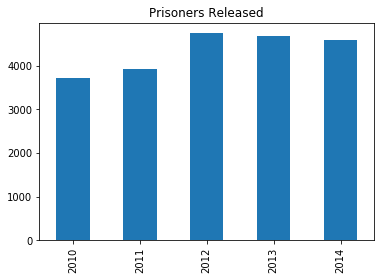

In [22]:
recidivism_data['Fiscal Year Released'].value_counts(dropna=False, sort=False).plot(kind='bar', title='Prisoners Released')

**Recidivism Reporting Year**

In [23]:
recidivism_data['Recidivism Reporting Year'].value_counts(dropna=False)

2015    4740
2016    4687
2017    4586
2014    3917
2013    3716
Name: Recidivism Reporting Year, dtype: int64

**Race - Ethnicity**

In [24]:
recidivism_data['Race - Ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               14586
Black - Non-Hispanic                                5106
White - Hispanic                                    1284
American Indian or Alaska Native - Non-Hispanic      404
Asian or Pacific Islander - Non-Hispanic             169
Black - Hispanic                                      30
NaN                                                   30
American Indian or Alaska Native - Hispanic           16
White -                                               11
N/A -                                                  5
Asian or Pacific Islander - Hispanic                   3
Black -                                                2
Name: Race - Ethnicity, dtype: int64

The "Race - Ethnicity" attribute has two names for missing values: 'NaN' (30 records) and 'N/A - ' (5 records). Convert 'N/A - ' to NaN to easily manipulate data in pandas. 

In [25]:
recidivism_data = recidivism_data.replace({"Race - Ethnicity":['N/A - ']},{"Race - Ethnicity":np.nan})

In [26]:
recidivism_data['Race - Ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               14586
Black - Non-Hispanic                                5106
White - Hispanic                                    1284
American Indian or Alaska Native - Non-Hispanic      404
Asian or Pacific Islander - Non-Hispanic             169
NaN                                                   35
Black - Hispanic                                      30
American Indian or Alaska Native - Hispanic           16
White -                                               11
Asian or Pacific Islander - Hispanic                   3
Black -                                                2
Name: Race - Ethnicity, dtype: int64

The "The "Race - Ethnicity" attribute now shows one name for missing values: 'NAN' (35 records)

**Sex**

In [27]:
recidivism_data['Sex'].value_counts(dropna=False)

M      18925
F       2718
NaN        3
Name: Sex, dtype: int64

**Age at release**

In [28]:
recidivism_data['Age At Release '].value_counts(dropna=False)

25-34           7919
35-44           5174
Under 25        3845
45-54           3639
55 and Older    1066
NaN                3
Name: Age At Release , dtype: int64

**Convicting Offense Classification**

In [29]:
recidivism_data['Convicting Offense Classification'].value_counts(dropna=False)

D Felony                                    8773
C Felony                                    5664
Aggravated Misdemeanor                      4076
B Felony                                    1494
Felony - Enhancement to Original Penalty    1200
Felony - Enhanced                            220
Serious Misdemeanor                          128
Special Sentence 2005                         69
Felony - Mandatory Minimum                     9
Other Felony                                   3
A Felony                                       3
Simple Misdemeanor                             2
Other Felony (Old Code)                        2
Sexual Predator Community Supervision          2
Other Misdemeanor                              1
Name: Convicting Offense Classification, dtype: int64

**Convicting Offense Type**

In [30]:
recidivism_data['Convicting Offense Type'].value_counts(dropna=False)

Drug            6603
Property        6091
Violent         4854
Public Order    3097
Other           1001
Name: Convicting Offense Type, dtype: int64

**Convicting Offense Subtype**

In [31]:
recidivism_data['Convicting Offense Subtype'].value_counts(dropna=False)

Trafficking                        5426
Assault                            2647
Burglary                           2449
Theft                              2201
OWI                                1571
Sex                                1063
Forgery/Fraud                      1002
Drug Possession                     933
Other Criminal                      891
Other Violent                       492
Traffic                             451
Murder/Manslaughter                 350
Weapons                             301
Alcohol                             298
Vandalism                           295
Robbery                             290
Other Drug                          244
Other Public Order                  241
Arson                               136
Sex Offender Registry/Residency     131
Flight/Escape                        70
Special Sentence Revocation          63
Kidnap                               53
Prostitution/Pimping                 34
Stolen Property                       8


**Release Type**

In [32]:
recidivism_data['Release Type'].value_counts(dropna=False)

Parole                                 9810
Discharged – End of Sentence           5039
Parole Granted                         2883
NaN                                    1762
Discharged - Expiration of Sentence    1215
Special Sentence                        347
Paroled w/Immediate Discharge           204
Released to Special Sentence            172
Paroled to Detainer - INS                81
Paroled to Detainer - Out of State       56
Paroled to Detainer - Iowa               41
Paroled to Detainer - U.S. Marshall      35
Interstate Compact Parole                 1
Name: Release Type, dtype: int64

There are 1,762 records with missing values for the attribute 'Release Type'. Convert 'NaN' to 'Unknown' value.

In [33]:
recidivism_data = recidivism_data.replace({"Release Type":[np.nan]},{"Release Type":'Unknown'})

In [34]:
recidivism_data['Release Type'].value_counts(dropna=False)

Parole                                 9810
Discharged – End of Sentence           5039
Parole Granted                         2883
Unknown                                1762
Discharged - Expiration of Sentence    1215
Special Sentence                        347
Paroled w/Immediate Discharge           204
Released to Special Sentence            172
Paroled to Detainer - INS                81
Paroled to Detainer - Out of State       56
Paroled to Detainer - Iowa               41
Paroled to Detainer - U.S. Marshall      35
Interstate Compact Parole                 1
Name: Release Type, dtype: int64

**Main Supervising District**

In [35]:
recidivism_data['Main Supervising District'].value_counts(dropna=False)

NaN                   8470
5JD                   3970
1JD                   2188
2JD                   1526
7JD                   1262
8JD                   1253
3JD                    931
6JD                    873
4JD                    514
ISC                    350
Interstate Compact     309
Name: Main Supervising District, dtype: int64

There are 8,470 records with missing values for the attribute 'Main Supervising District'. Convert 'NaN' to 'Unknown' value.

In [36]:
recidivism_data = recidivism_data.replace({"Main Supervising District":[np.nan]},{"Main Supervising District":'Unknown'})

In [37]:
recidivism_data['Main Supervising District'].value_counts(dropna=False)

Unknown               8470
5JD                   3970
1JD                   2188
2JD                   1526
7JD                   1262
8JD                   1253
3JD                    931
6JD                    873
4JD                    514
ISC                    350
Interstate Compact     309
Name: Main Supervising District, dtype: int64

**Recidivism - Return to Prison**

In [38]:
recidivism_data['Recidivism - Return to Prison'].value_counts(dropna=False)

No     14619
Yes     7027
Name: Recidivism - Return to Prison, dtype: int64

**Recidivism Type**

In [39]:
recidivism_data['Recidivism Type'].value_counts(dropna=False)

No Recidivism    11656
New               4554
NaN               2963
Tech              2473
Name: Recidivism Type, dtype: int64

The values for the 'Recidivism Type'indicates 'No Recidivism' has 11,656 records, 'New' and 'Tech' have 7027 records. However, the attribute 'Recidivism - Return to Prison' shows there are 14,619 recidivism instances. Therefore, it is likely that the 'NaN' values are actually 'No Recidivism' for the attribute 'Recidivism Type'. Convert 'NaN' to 'No Recidivism'.

In [40]:
recidivism_data = recidivism_data.replace({"Recidivism Type":[np.nan]},{"Recidivism Type":'No Recidivism'})

In [41]:
recidivism_data['Recidivism Type'].value_counts(dropna=False)

No Recidivism    14619
New               4554
Tech              2473
Name: Recidivism Type, dtype: int64

**Days to Recidivism**

In [42]:
recidivism_data['Days to Recidivism'].value_counts(dropna=False)

NaN        14619
 287.0        22
 231.0        20
 330.0        19
 292.0        19
 474.0        19
 169.0        18
 210.0        18
 189.0        18
 336.0        18
 314.0        17
 281.0        16
 273.0        16
 181.0        16
 272.0        16
 238.0        16
 275.0        16
 209.0        16
 649.0        16
 407.0        16
 224.0        16
 386.0        16
 133.0        16
 120.0        16
 455.0        16
 188.0        16
 175.0        16
 384.0        15
 323.0        15
 328.0        15
           ...  
 848.0         1
 937.0         1
 876.0         1
 597.0         1
 999.0         1
 856.0         1
 970.0         1
 836.0         1
 1057.0        1
 900.0         1
 985.0         1
 640.0         1
 800.0         1
 40.0          1
 1006.0        1
 927.0         1
 29.0          1
 890.0         1
 1063.0        1
 479.0         1
 834.0         1
 840.0         1
 31.0          1
 814.0         1
 863.0         1
 13.0          1
 790.0         1
 30.0         

The values for the 'Days to Recidivism'indicates 'NaN' has 14,619 records. These records are actually for individuals who did not return to prison. Convert 'NaN' to 0 for convenience.

In [43]:
recidivism_data = recidivism_data.replace({"Days to Recidivism":[np.nan]},{"Days to Recidivism":'0'})

In [44]:
recidivism_data['Days to Recidivism'].value_counts(dropna=False)

0         14619
287.0        22
231.0        20
292.0        19
474.0        19
330.0        19
336.0        18
189.0        18
210.0        18
169.0        18
314.0        17
238.0        16
649.0        16
209.0        16
133.0        16
273.0        16
175.0        16
275.0        16
281.0        16
120.0        16
407.0        16
181.0        16
455.0        16
224.0        16
272.0        16
188.0        16
386.0        16
323.0        15
343.0        15
511.0        15
          ...  
970.0         1
1010.0        1
1020.0        1
999.0         1
997.0         1
790.0         1
900.0         1
800.0         1
985.0         1
479.0         1
746.0         1
1051.0        1
814.0         1
1057.0        1
1063.0        1
611.0         1
1066.0        1
834.0         1
840.0         1
848.0         1
937.0         1
856.0         1
934.0         1
587.0         1
863.0         1
1088.0        1
927.0         1
597.0         1
876.0         1
836.0         1
Name: Days to Recidivism

**New Conviction Offense Classification**

In [45]:
recidivism_data['New Conviction Offense Classification'].value_counts(dropna=False)

NaN                                         16582
D Felony                                     1900
Aggravated Misdemeanor                       1282
C Felony                                      869
Felony - Enhancement to Original Penalty      517
Serious Misdemeanor                           227
B Felony                                      222
Public Order                                   13
A Felony                                       10
Simple Misdemeanor                              9
Special Sentence 2005                           6
Violent                                         4
Drug                                            2
Other Misdemeanor                               2
Felony - Mandatory Minimum                      1
Name: New Conviction Offense Classification, dtype: int64

There are 16,582 'NaN' values for the attribute 'New Conviction Offense Classification'. This includes instances where there was no recidivism. Convert 'NaN' to 'No New Conviction' for those instances.

In [46]:
recidivism_data[recidivism_data["Days to Recidivism"]=='0'] = recidivism_data.where(recidivism_data["Days to Recidivism"]=='0').replace({"New Conviction Offense Classification":[np.nan]},{"New Conviction Offense Classification":'No New Conviction'})

In [47]:
recidivism_data['New Conviction Offense Classification'].value_counts(dropna=False)

No New Conviction                           14619
NaN                                          1963
D Felony                                     1900
Aggravated Misdemeanor                       1282
C Felony                                      869
Felony - Enhancement to Original Penalty      517
Serious Misdemeanor                           227
B Felony                                      222
Public Order                                   13
A Felony                                       10
Simple Misdemeanor                              9
Special Sentence 2005                           6
Violent                                         4
Drug                                            2
Other Misdemeanor                               2
Felony - Mandatory Minimum                      1
Name: New Conviction Offense Classification, dtype: int64

Convert the remaining 'NaN' to 'Unknown'

In [48]:
recidivism_data = recidivism_data.replace({"New Conviction Offense Classification":[np.nan]},{"New Conviction Offense Classification":'Unknown'})

In [49]:
recidivism_data['New Conviction Offense Classification'].value_counts(dropna=False)

No New Conviction                           14619
Unknown                                      1963
D Felony                                     1900
Aggravated Misdemeanor                       1282
C Felony                                      869
Felony - Enhancement to Original Penalty      517
Serious Misdemeanor                           227
B Felony                                      222
Public Order                                   13
A Felony                                       10
Simple Misdemeanor                              9
Special Sentence 2005                           6
Violent                                         4
Drug                                            2
Other Misdemeanor                               2
Felony - Mandatory Minimum                      1
Name: New Conviction Offense Classification, dtype: int64

**New Conviction Offense Type**

In [50]:
recidivism_data['New Conviction Offense Type'].value_counts(dropna=False)

NaN                16582
Drug                1474
Property            1393
Public Order         987
Violent              806
Other                385
Flight/Escape         12
Assault                3
Drug Possession        2
Traffic                1
Sex                    1
Name: New Conviction Offense Type, dtype: int64

There are 16,582 'NaN' values for the attribute 'New Conviction Offense Type'. This includes instances where there was no recidivism. Convert 'NaN' to 'No New Conviction' for those instances.

In [51]:
recidivism_data[recidivism_data["Days to Recidivism"]=='0'] = recidivism_data.where(recidivism_data["Days to Recidivism"]=='0').replace({"New Conviction Offense Type":[np.nan]},{"New Conviction Offense Type":'No New Conviction'})

In [52]:
recidivism_data['New Conviction Offense Type'].value_counts(dropna=False)

No New Conviction    14619
NaN                   1963
Drug                  1474
Property              1393
Public Order           987
Violent                806
Other                  385
Flight/Escape           12
Assault                  3
Drug Possession          2
Traffic                  1
Sex                      1
Name: New Conviction Offense Type, dtype: int64

Convert the remaining 'NaN' to 'Unknown'

In [53]:
recidivism_data = recidivism_data.replace({"New Conviction Offense Type":[np.nan]},{"New Conviction Offense Type":'Unknown'})

In [54]:
recidivism_data['New Conviction Offense Type'].value_counts(dropna=False)

No New Conviction    14619
Unknown               1963
Drug                  1474
Property              1393
Public Order           987
Violent                806
Other                  385
Flight/Escape           12
Assault                  3
Drug Possession          2
Traffic                  1
Sex                      1
Name: New Conviction Offense Type, dtype: int64

**New Conviction Offense Sub Type**

In [55]:
recidivism_data['New Conviction Offense Sub Type'].value_counts(dropna=False)

NaN                     16601
Trafficking              1005
Assault                   603
Theft                     595
Burglary                  469
Drug Possession           431
Other Criminal            376
OWI                       298
Forgery/Fraud             247
Traffic                   182
Other Public Order        164
Alcohol                   128
Flight/Escape             126
Weapons                    82
Other Violent              68
Vandalism                  55
Robbery                    52
Sex                        44
Other Drug                 38
Murder/Manslaughter        30
Arson                      25
Kidnap                     16
Prostitution/Pimping        7
Animals                     2
Stolen Property             1
Other Property              1
Name: New Conviction Offense Sub Type, dtype: int64

There are 16,601 'NaN' values for the attribute 'New Conviction Offense Sub Type'. This includes instances where there was no recidivism. Convert 'NaN' to 'No New Conviction' for those instances.

In [56]:
recidivism_data[recidivism_data["Days to Recidivism"]=='0'] = recidivism_data.where(recidivism_data["Days to Recidivism"]=='0').replace({"New Conviction Offense Sub Type":[np.nan]},{"New Conviction Offense Sub Type":'No New Conviction'})

In [57]:
recidivism_data['New Conviction Offense Sub Type'].value_counts(dropna=False)

No New Conviction       14619
NaN                      1982
Trafficking              1005
Assault                   603
Theft                     595
Burglary                  469
Drug Possession           431
Other Criminal            376
OWI                       298
Forgery/Fraud             247
Traffic                   182
Other Public Order        164
Alcohol                   128
Flight/Escape             126
Weapons                    82
Other Violent              68
Vandalism                  55
Robbery                    52
Sex                        44
Other Drug                 38
Murder/Manslaughter        30
Arson                      25
Kidnap                     16
Prostitution/Pimping        7
Animals                     2
Other Property              1
Stolen Property             1
Name: New Conviction Offense Sub Type, dtype: int64

Convert the remaining 'NaN' to 'Unknown'

In [58]:
recidivism_data = recidivism_data.replace({"New Conviction Offense Sub Type":[np.nan]},{"New Conviction Offense Sub Type":'Unknown'})

In [59]:
recidivism_data['New Conviction Offense Sub Type'].value_counts(dropna=False)

No New Conviction       14619
Unknown                  1982
Trafficking              1005
Assault                   603
Theft                     595
Burglary                  469
Drug Possession           431
Other Criminal            376
OWI                       298
Forgery/Fraud             247
Traffic                   182
Other Public Order        164
Alcohol                   128
Flight/Escape             126
Weapons                    82
Other Violent              68
Vandalism                  55
Robbery                    52
Sex                        44
Other Drug                 38
Murder/Manslaughter        30
Arson                      25
Kidnap                     16
Prostitution/Pimping        7
Animals                     2
Other Property              1
Stolen Property             1
Name: New Conviction Offense Sub Type, dtype: int64

**Part of Target Population**

In [60]:
recidivism_data['Part of Target Population'].value_counts(dropna=False)

Yes    11468
No     10178
Name: Part of Target Population, dtype: int64

**Target Population:** Prisoners associated with specific strategies to reduce recidivism rates for offenders supervised as High Normal or Intensive

In [61]:
recidivism_data.shape

(21646, 17)

In [62]:
recidivism_data = recidivism_data.dropna()

In [63]:
recidivism_data.shape

(21611, 17)

In [64]:
recidivism_data.to_pickle('RecidivismData_forAnalysis')

In [65]:
recidivism_data['Race - Ethnicity'].isnull().sum()

0

**Recidivism Type:**<br/>
New = Admission to prison with a new conviction for an offense occuring after being released from prison <br/>
Tech = Admission to prison for violation of prison requirenments

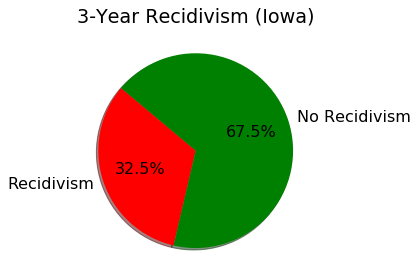

In [66]:
matplotlib.rcParams['axes.titlepad'] = 20 
matplotlib.rcParams['font.size'] = 16
#labels = 'New', 'Technical','No'
labels = 'Recidivism','No Recidivism'
#sizes = [4554, 2473, 14619]
sizes = [7027, 14619]
colors = ['red','green']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('3-Year Recidivism (Iowa)') 
plt.axis('equal')
plt.savefig('recidivism_ratio.eps',format = 'eps',dpi = 1300)
plt.show()

In [67]:
##recidivism_yes = recidivism_data[recidivism_data['Recidivism - Return to Prison'] == 'Yes']

In [68]:
#recidivism_yes['Days to Recidivism'].value_counts(dropna=False)